```
NAO Bioinformatics Engineer: Initial Work Test (25 minutes)
Task Description
You have been provided with input data in FASTA format, with the following specifications:
The file consists of alternating lines of sequence headers (consisting of > followed by a random ASCII string) and short sequences (consisting of strings of five possible characters: A, C, G, T and N, where the latter represents an ambiguous base).
Each sequence comprises a single line of uppercase characters. There are no empty lines, lowercase characters, or special sequence characters other than N. We are not trying to trick you with the file format.
Sequence IDs are unique random strings and are not meaningful. We are interested in the sequences, not their IDs.
In your language of choice, write a script that:
Parses the FASTA file and reads in the sequences
For each unique sequence, calculates:
The number of times that sequence appears in the file
The base composition of the sequence: the fraction of characters in the sequence corresponding to each possible character
Outputs a CSV file named sequences_out.csv, which has one row per sequence and the following columns, sorted in lexicographical order by sequence (so AAA should precede AAG should precede GAC):
sequence: The raw sequence
count: The number of instances of the sequence in the input file
pA, pC, pG, pT, pN: Fraction of characters in the sequence corresponding to each possible character.
Outputs a second CSV file named summary.csv. This file should have two columns, statistic and value. The statistic column should have the following values in order, each of which corresponds to a summary statistic in the value column calculated by you:
total_sequences_raw: Total number of sequences in the input FASTA file.
total_sequences_unique: Number of unique sequences in the input FASTA file.
total_sequences_duplicated: Number of duplicated sequences (unique sequences with count > 1) in the input FASTA file.
total_sequences_ambiguous: Number of unique sequences containing at least one ambiguous base (N).
max_count: Maximum value of count across all sequences.
max_GC: Maximum GC content (where GC content is the sum of pG and pC) across all sequences.
Upload your script, sequences_out.csv and summary.csv to the Google Drive folder provided.
Other Information
You have 25 minutes to complete this task.
You can use any language you like to complete this task; we encourage you to complete it in the language you feel most comfortable in and will not penalise you based on your choice of language. In the absence of a strong language preference, we recommend Python as a good fit for this task.
Whatever language you choose, you should provide an executable script, not a notebook (i.e. not Jupyter, Quarto, etc). If you choose a compiled language, you should provide both the source code and the compiled executable.
You will be graded on (i) how well your CSV files match the correct output, and (ii) our subjective impression of your script quality (clarity, correctness, conciseness, etc).
You’re welcome and encouraged to use any libraries (e.g. Biopython, Pandas, Bioconductor) you think will be helpful.
Your CSV files will be graded automatically, so make sure they have the exact correct fieldnames and row order to avoid losing easy points.
You should represent fractions in decimal form with at least six digits of precision (e.g. 0.123456). Do not use percentages.
You can use inline tab-completion tools like Copilot and Cursor, and if you have time you can use AI tools to check your code for errors. However, you should not provide the text of the task to an LLM nor use one to write the script from scratch; we want to see how you approach and structure the problem.
If you run over the time limit and still want to complete the assignment, our system will still accept late submissions. We’ll dock points based on how late the submission is, but will not reject late submissions out of hand.
```


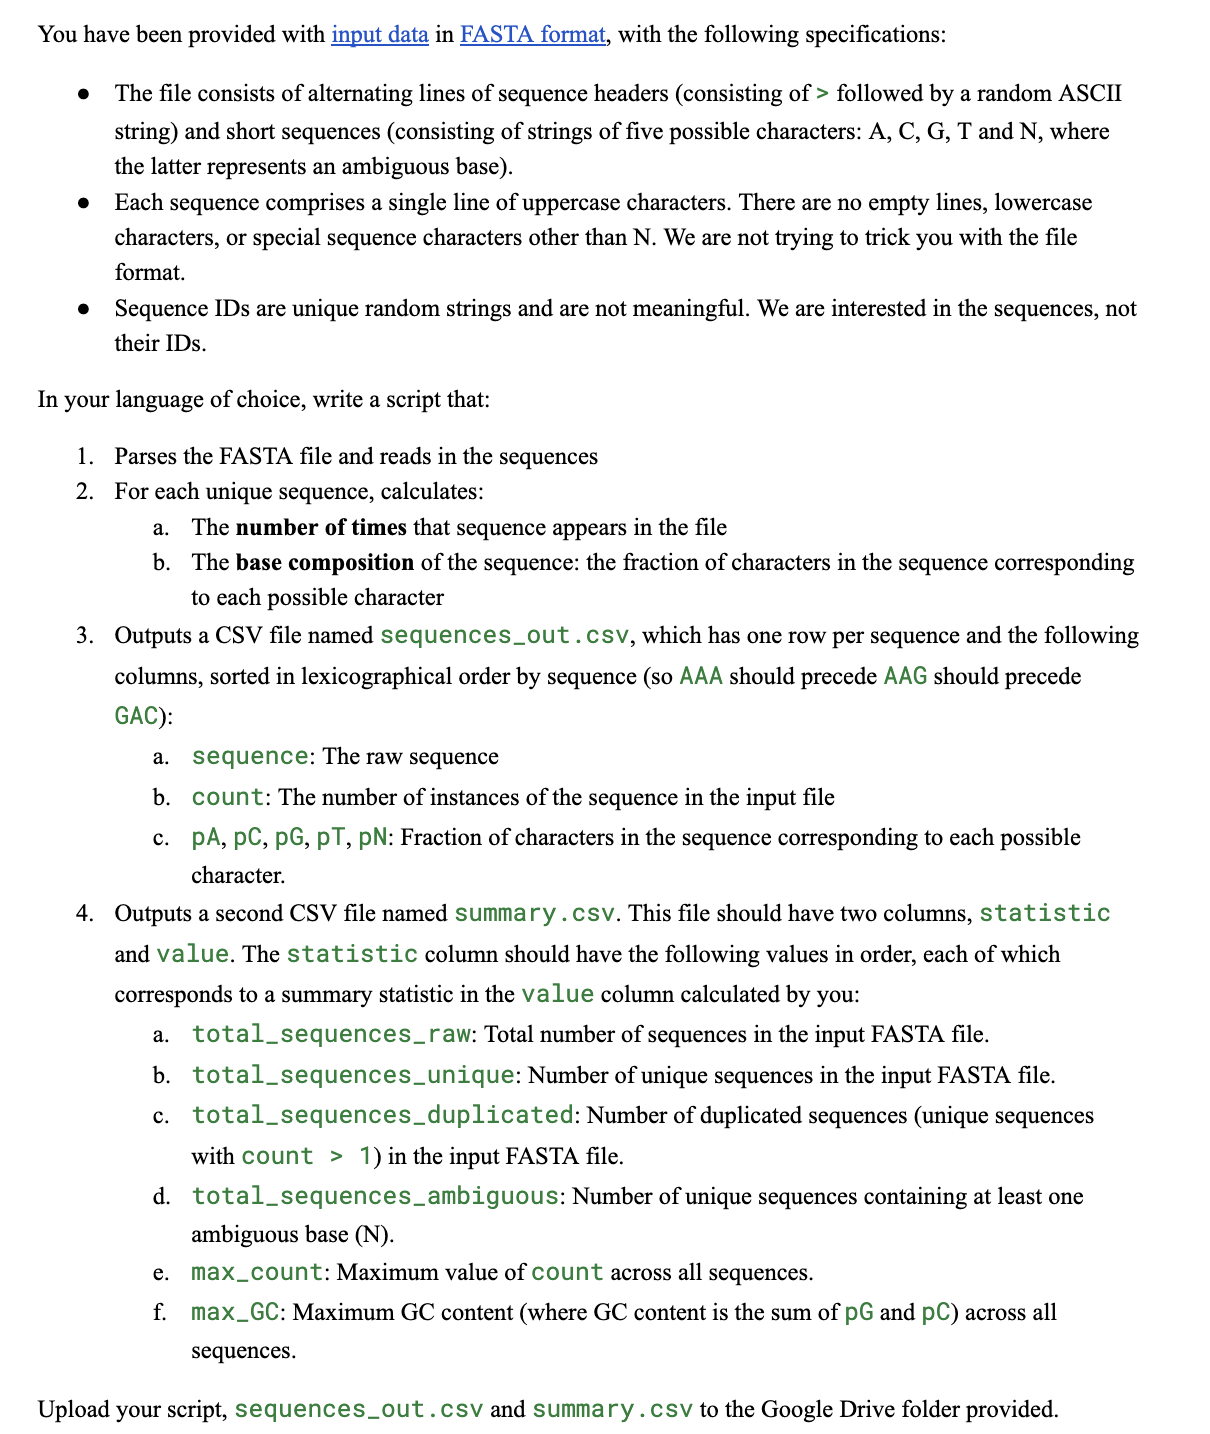

In [26]:
import pandas as pd
from collections import defaultdict
import csv
import io
fasta_data = "task.fasta"
seq_out_file = 'sequences_out.csv'
summary_file = 'summary.csv'

file_path='task.fasta'
with open(file_path, 'r') as f:
    sequences_raw = [
        line.strip()
        for line in f
        if line.strip() and not line.startswith('>')
    ]
total_sequences_raw = len(sequences_raw)
print(total_sequences_raw)
df = pd.DataFrame({'sequence': sequences_raw})
df_sequences = df.groupby('sequence').size().reset_index(name='count')

def calc_fractions(seq):
    length = len(seq)
    return pd.Series({
        f'p{base}': seq.count(base) / length
        for base in 'ACGTN'
    })

df_fractions = df_sequences['sequence'].apply(calc_fractions)
df_sequences = pd.concat([df_sequences, df_fractions], axis=1)
df_sequences = df_sequences.sort_values(by='sequence').reset_index(drop=True)

output_cols = ['sequence', 'count', 'pA', 'pC', 'pG', 'pT', 'pN']
df_sequences[output_cols].to_csv(seq_out_file, index=False)
print(f"Sequence data successfully saved to {seq_out_file}")
# Calculate max GC for summary
df_sequences['GC'] = df_sequences['pG'] + df_sequences['pC']

total_sequences_unique = len(df_sequences)
total_sequences_duplicated = (df_sequences['count'] > 1).sum()
total_sequences_ambiguous = df_sequences['sequence'].str.contains('N').sum()
max_count = df_sequences['count'].max() if not df_sequences.empty else 0
max_GC = df_sequences['GC'].max() if not df_sequences.empty else 0.0

summary_data = {
    'statistic': [
        'total_sequences_raw', 'total_sequences_unique', 'total_sequences_duplicated',
        'total_sequences_ambiguous', 'max_count', 'max_GC'
    ],
    'value': [
        total_sequences_raw, total_sequences_unique, total_sequences_duplicated,
        total_sequences_ambiguous, int(max_count), max_GC
    ]
}
df_summary = pd.DataFrame(summary_data)
df_summary.to_csv(summary_file, index=False)
print(f"Summary data successfully saved to {summary_file}")

253
Sequence data successfully saved to sequences_out.csv
Summary data successfully saved to summary.csv
